## <div style="text-align: center; background-color: #ffffff; font-family:Times New Roman; color: black; padding: 14px; line-height: 1;border-radius:20px">🖥 Top 200 YouTube Channels in 2024 (As of 18th June 2024)</div>

### <div>📁 About the Dataset<div>
    
<h3 style='font-family: Times New Roman'>
    
This dataset contains 6 columns, each are:
    </h3>
    
    
*  (1) <b>rank</b>:           Rank of YouTube Channel (Sorted by Subscribers)
    
*  (2) <b>channel_name</b>:      Name of Channel
    
*  (3) <b>no_of_videos</b>:   Number of Uploaded Videos
    
*  (4) <b>no_of_subscribers</b>:   Number of Subscribers
    
*  (5) <b>total_views</b>:   Total Number of Video Views
    
*  (6) <b>category</b>:      Category of the Video

### Import libraries

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

### Import the Dataset & Data Preprocessing

In [123]:
df = pd.read_csv("../EDA on YouTube Data/youtube_dataset.csv")
df.head(10)

,rank,channel_name,no_of_videos,no_of_subscribers,total_views,category
0,#1,MrBeast,799,274M,50.98B,Entertainment
1,#2,T-Series,21.12K,267M,257.16B,Music
2,#3,Cocomelon - Nursery Rhymes,1.18K,176M,182.88B,Kids
3,#4,SET India,138.97K,173M,164.71B,Entertainment
4,#5,✿ Kids Diana Show,1.22K,123M,103.5B,Kids
5,#6,Vlad and Niki,721,119M,90.94B,Kids
6,#7,Like Nastya,885,116M,100.9B,Kids
7,#8,PewDiePie,4.77K,111M,29.31B,Entertainment
8,#9,Zee Music Company,11.22K,107M,66.84B,Music
9,#10,WWE,76.61K,102M,84.98B,Sports/Entertainment


Convert the suffixes K, M, B to numerical values

In [124]:
def convert_to_number(s):
    if 'K' in s:
        return float(s.replace('K', '')) * 1_000
    elif 'M' in s:
        return float(s.replace('M', '')) * 1_000_000
    elif 'B' in s:
        return float(s.replace('B', '')) * 1_000_000_000
    else:
        return float(s)

# Apply the conversion function to the relevant columns
df['no_of_videos'] = df['no_of_videos'].apply(convert_to_number)
df['no_of_subscribers'] = df['no_of_subscribers'].apply(convert_to_number)
df['total_views'] = df['total_views'].apply(convert_to_number)

# Convert the columns to integers to remove decimal points
df['no_of_videos'] = df['no_of_videos'].astype(int)
df['no_of_subscribers'] = df['no_of_subscribers'].astype(int)
# df['total_views'] = df['total_views'].astype(int)

# Display the dataframe to verify the changes
df.head(10)

,rank,channel_name,no_of_videos,no_of_subscribers,total_views,category
0,#1,MrBeast,799,274000000,5.098000e+10,Entertainment
1,#2,T-Series,21120,267000000,2.571600e+11,Music
2,#3,Cocomelon - Nursery Rhymes,1180,176000000,1.828800e+11,Kids
3,#4,SET India,138970,173000000,1.647100e+11,Entertainment
4,#5,✿ Kids Diana Show,1220,123000000,1.035000e+11,Kids
5,#6,Vlad and Niki,721,119000000,9.094000e+10,Kids
6,#7,Like Nastya,885,116000000,1.009000e+11,Kids
7,#8,PewDiePie,4770,111000000,2.931000e+10,Entertainment
8,#9,Zee Music Company,11220,107000000,6.684000e+10,Music
9,#10,WWE,76610,102000000,8.498000e+10,Sports/Entertainment


In [125]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df['category'].value_counts())

        no_of_videos  no_of_subscribers   total_views
count     200.000000       2.000000e+02  2.000000e+02
mean    19587.485000       5.019450e+07  2.823645e+10
std     56530.405005       3.096043e+07  2.866972e+10
min        65.000000       3.160000e+07  1.660000e+09
25%       598.250000       3.530000e+07  1.415000e+10
50%      1505.000000       4.100000e+07  2.280500e+10
75%      7085.000000       5.125000e+07  3.178000e+10
max    379590.000000       2.740000e+08  2.571600e+11
category
 Entertainment              69
 Music                      54
 Kids                       30
 Gaming/Entertainment       16
 Education                   6
 Movies                      6
 News                        4
 Sports/Entertainment        2
 Gaming                      2
 DIY/Education               1
 Kids                        1
 Kids                        1
 Kids                        1
 Education                   1
 Travel/Entertainment        1
 Animation                   1
 Kids    

In [126]:
# Clean up and consolidate the 'category' column
df['category'] = df['category'].str.strip().str.lower()  # Remove leading/trailing spaces and convert to lowercase

# Consolidate variations of the "kids" category
df['category'] = df['category'].replace({'kids': 'kids'})

# Recheck the value counts to ensure consolidation
print(df['category'].value_counts())

category
entertainment           69
music                   55
kids                    35
gaming/entertainment    16
education                7
movies                   6
news                     4
sports/entertainment     2
gaming                   2
diy/education            1
travel/entertainment     1
animation                1
platform                 1
Name: count, dtype: int64


In [127]:
df.drop('rank',axis=1,inplace=True)

df = df.dropna().reset_index()
df.drop('index',axis=1, inplace=True)

In [128]:
# Define a consistent color palette
color_palette = sns.color_palette("viridis", as_cmap=False)
sns.set_palette(color_palette)

### Data Visualization

Top 10 Channels by Number of Subscribers

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


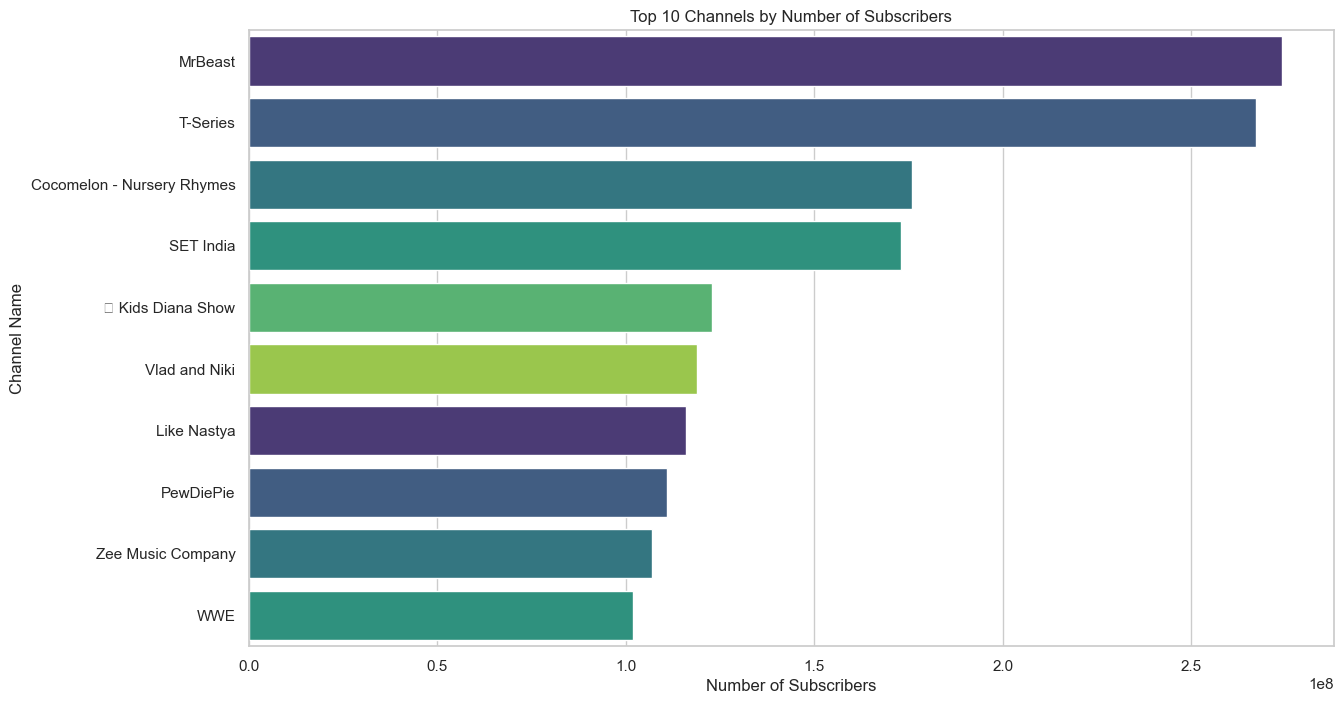

In [143]:
# Top 10 channels by number of subscribers
top_10_subscribers = df.nlargest(10, 'no_of_subscribers')

plt.figure(figsize=(14, 8))
sns.barplot(x='no_of_subscribers', y='channel_name', data=top_10_subscribers, palette=color_palette)
plt.title('Top 10 Channels by Number of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Channel Name')
plt.show()

Top 10 Channels by Total Views

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


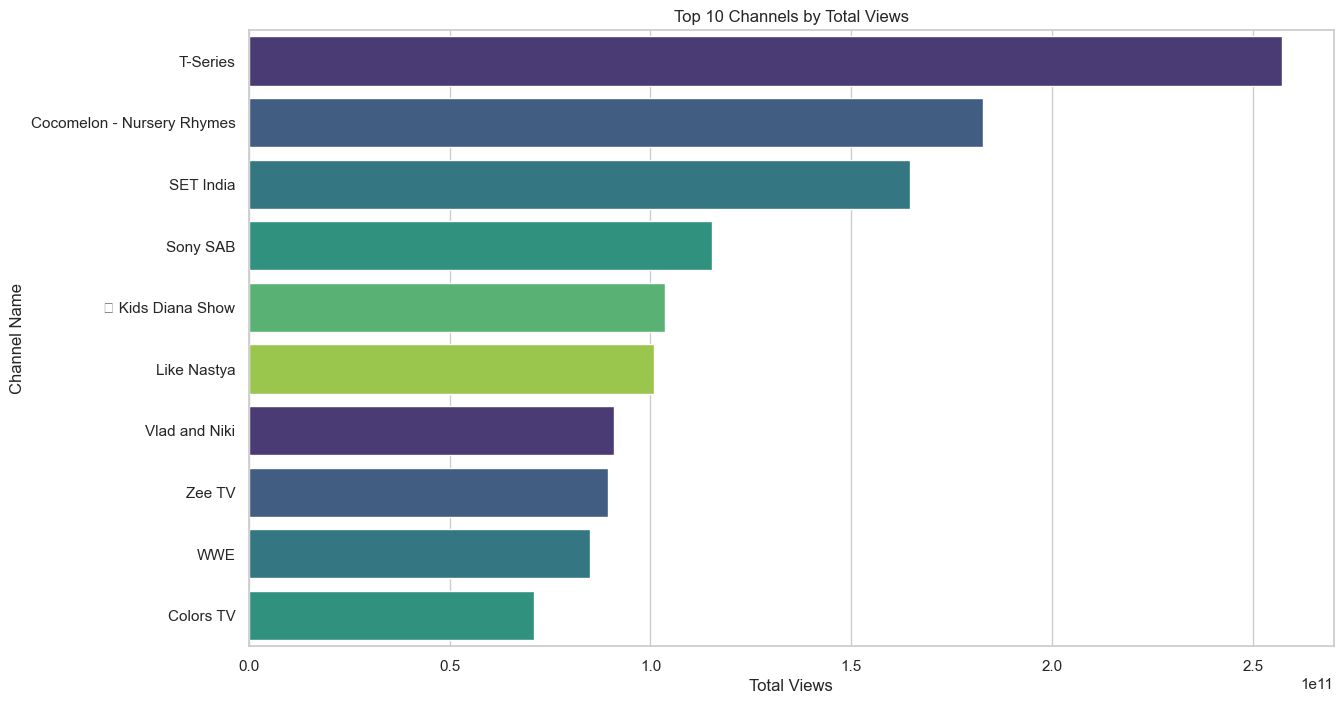

In [144]:
# Top 10 channels by total views
top_10_views = df.nlargest(10, 'total_views')

plt.figure(figsize=(14, 8))
sns.barplot(x='total_views', y='channel_name', data=top_10_views, palette=color_palette)
plt.title('Top 10 Channels by Total Views')
plt.xlabel('Total Views')
plt.ylabel('Channel Name')
plt.show()

Distribution of Categories

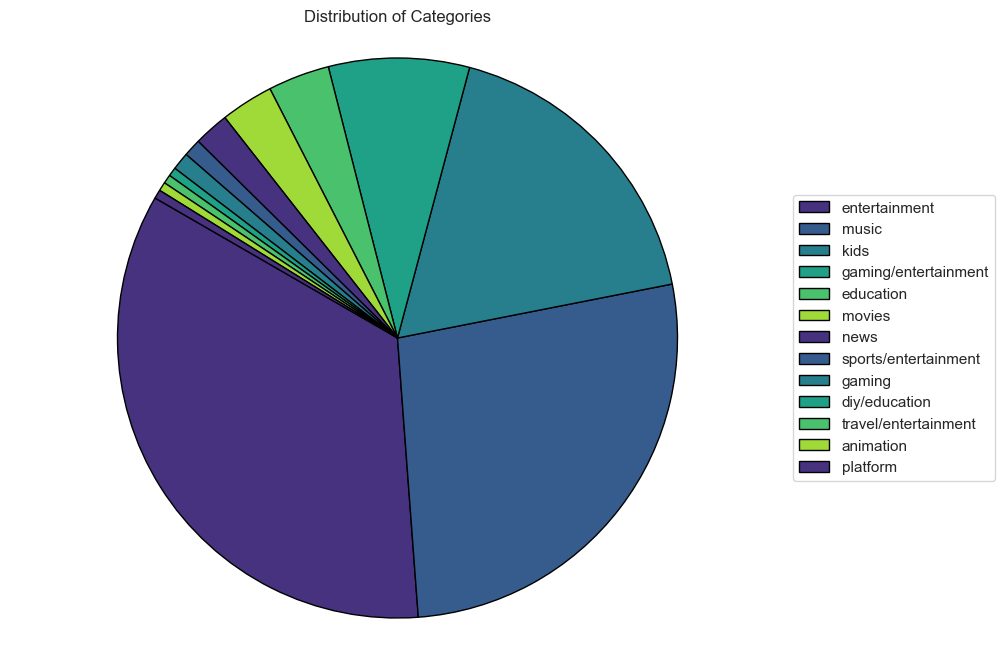

In [139]:
# Pie Chart of Category Distribution with Legend on the Side
category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts, startangle=150, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend with category labels
plt.legend(category_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

Box-Plot of (1) Video Views & (2) Subscribers

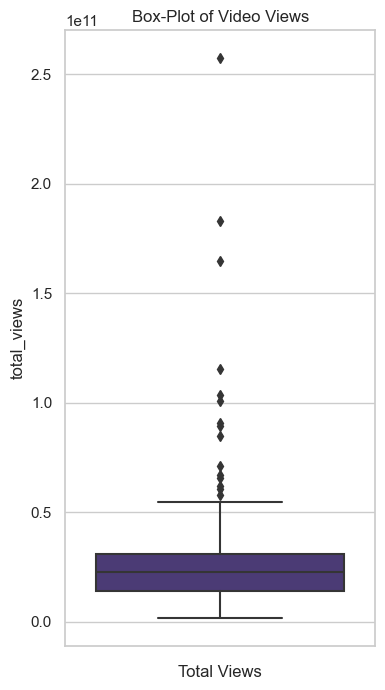

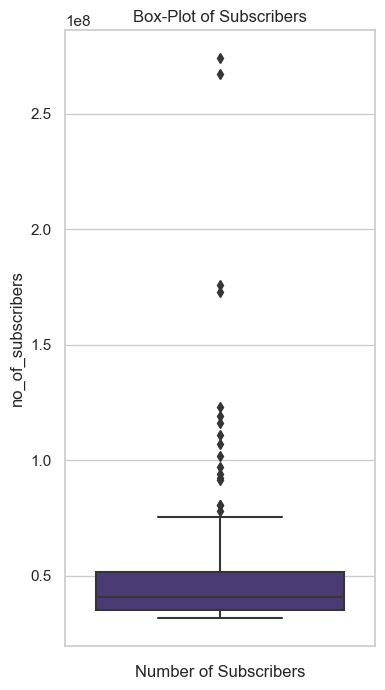

In [140]:
# Box-Plot of Video Views, Video Count, and Subscribers
sns.set(style="whitegrid")

# Box-plot of video views
plt.figure(figsize=(4, 8))
sns.boxplot(y=df['total_views'], palette=color_palette)
plt.title('Box-Plot of Video Views')
plt.xlabel('Total Views')
plt.show()

# Box-plot of subscribers
plt.figure(figsize=(4, 8))
sns.boxplot(y=df['no_of_subscribers'], palette=color_palette)
plt.title('Box-Plot of Subscribers')
plt.xlabel('Number of Subscribers')
plt.show()

Mean Subscribers by Category

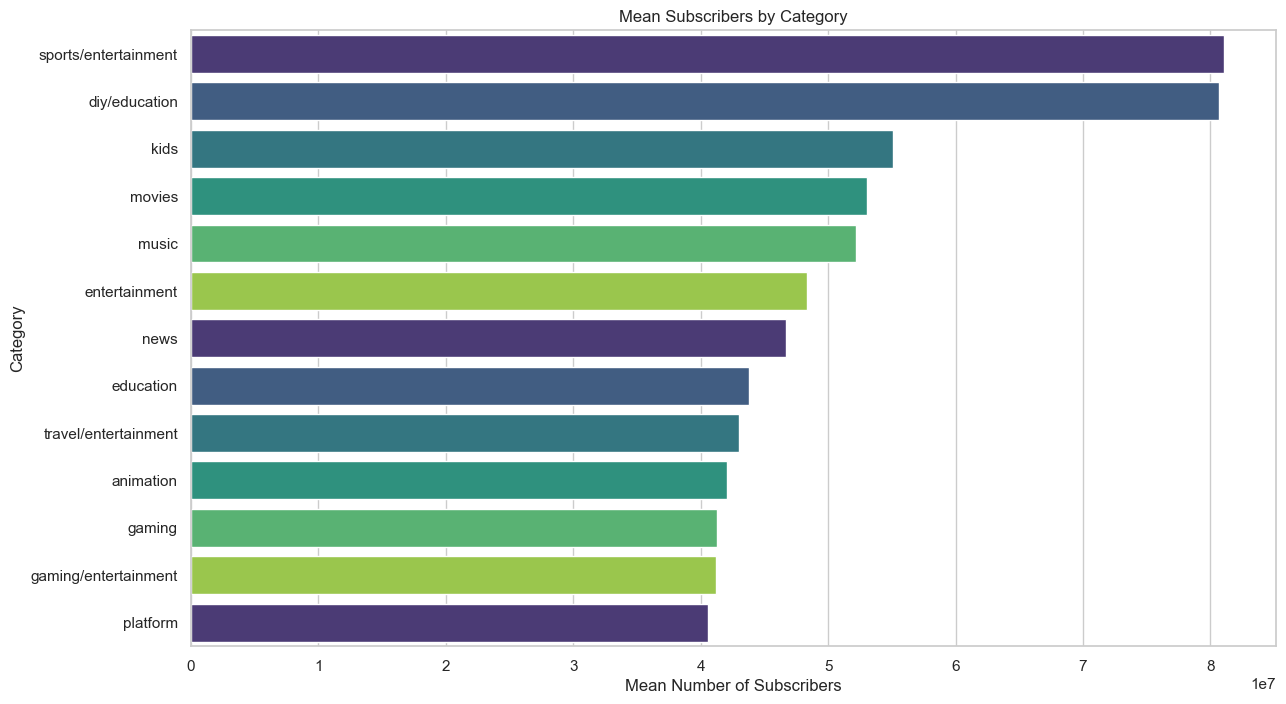

In [142]:
# Mean Subscribers by Category
mean_subscribers_by_category = df.groupby('category')['no_of_subscribers'].mean().sort_values(ascending=False)

# Plot the mean subscribers by category
plt.figure(figsize=(14, 8))
sns.barplot(x=mean_subscribers_by_category.values, y=mean_subscribers_by_category.index, palette=color_palette)
plt.title('Mean Subscribers by Category')
plt.xlabel('Mean Number of Subscribers')
plt.ylabel('Category')
plt.show()

Youtuber with Most Subscribers by Each Category

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


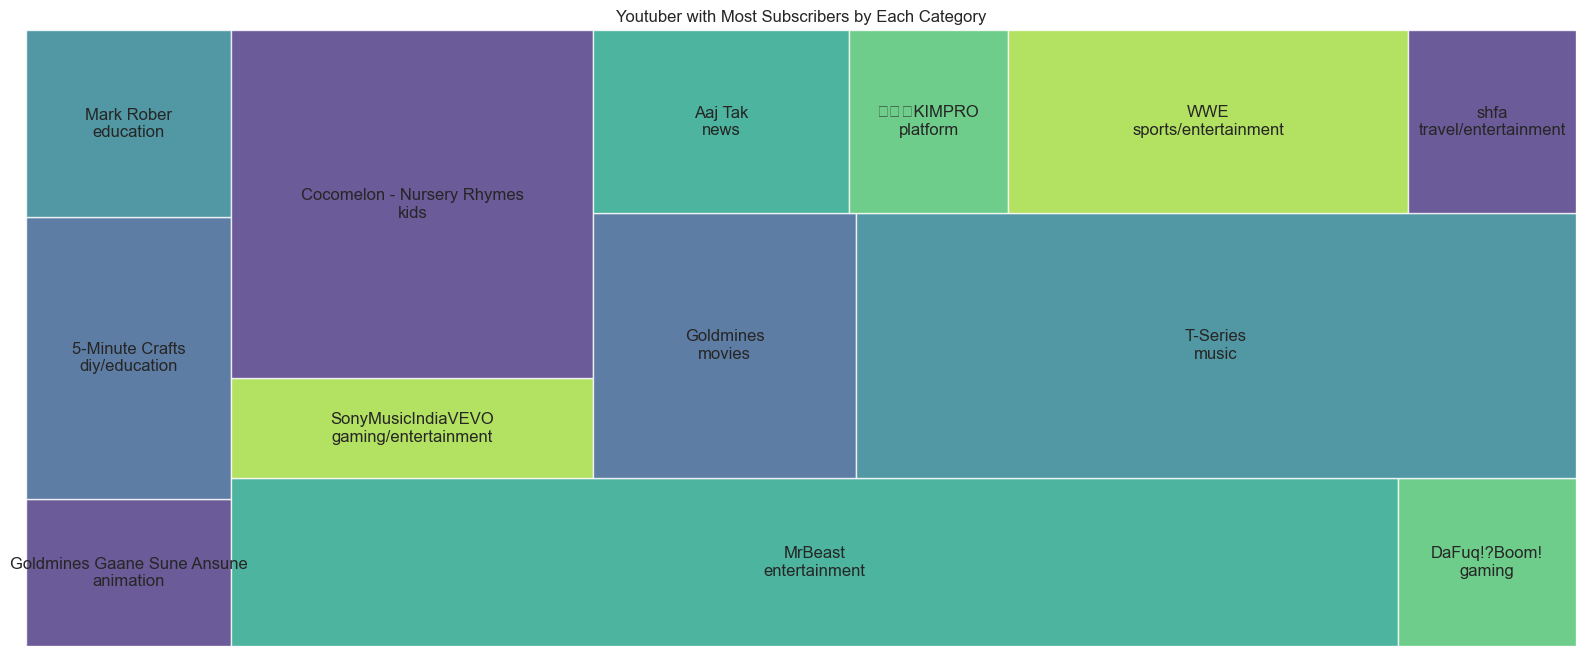

In [146]:
import squarify

# Find the youtuber with most subscribers by each category
most_subscribers_by_category = df.loc[df.groupby('category')['no_of_subscribers'].idxmax()]

# Treemap
plt.figure(figsize=(20, 8))
squarify.plot(sizes=most_subscribers_by_category['no_of_subscribers'], label=most_subscribers_by_category['channel_name'] + "\n" + most_subscribers_by_category['category'], alpha=.8, color=color_palette)
plt.title('Youtuber with Most Subscribers by Each Category')
plt.axis('off')
plt.show()

Youtuber with Most Subscribers by Each Category

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


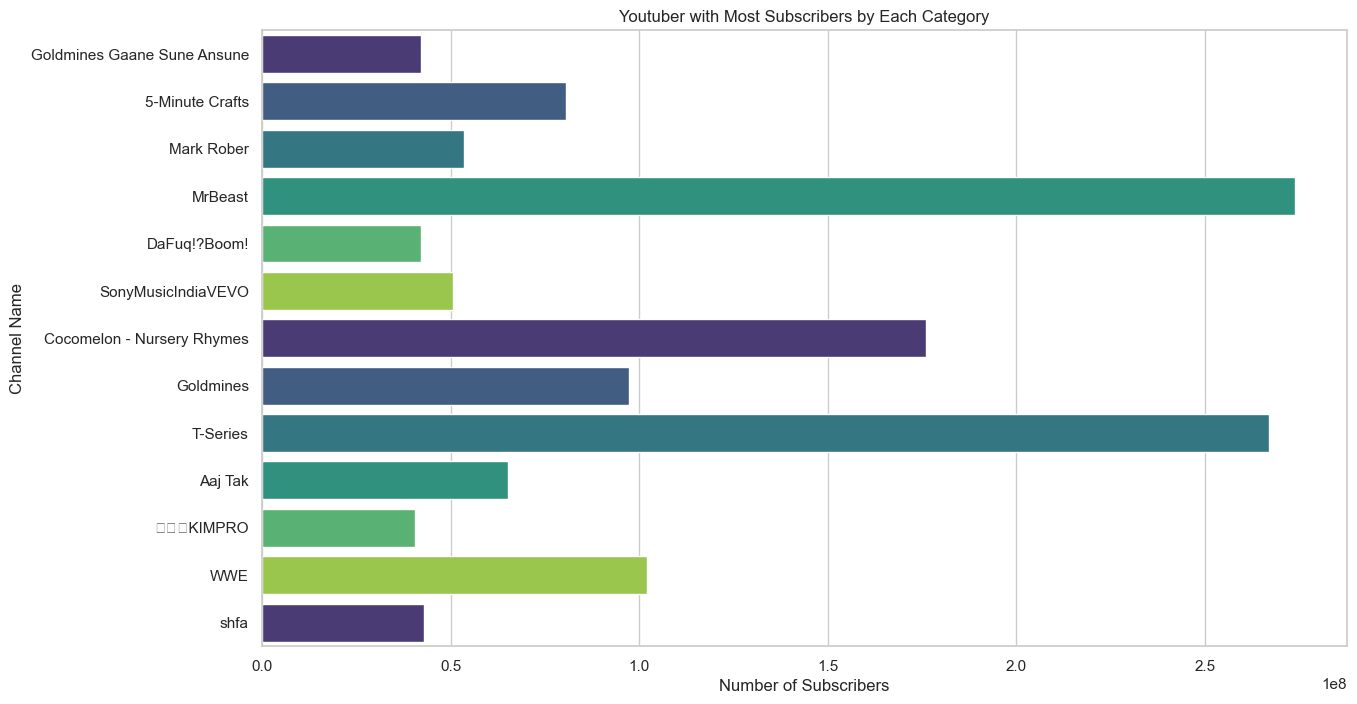

In [147]:
# Plot a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='no_of_subscribers', y='channel_name', data=most_subscribers_by_category, palette=color_palette)
plt.title('Youtuber with Most Subscribers by Each Category')
plt.xlabel('Number of Subscribers')
plt.ylabel('Channel Name')
plt.show()

Distribution of Each Category on Video Views

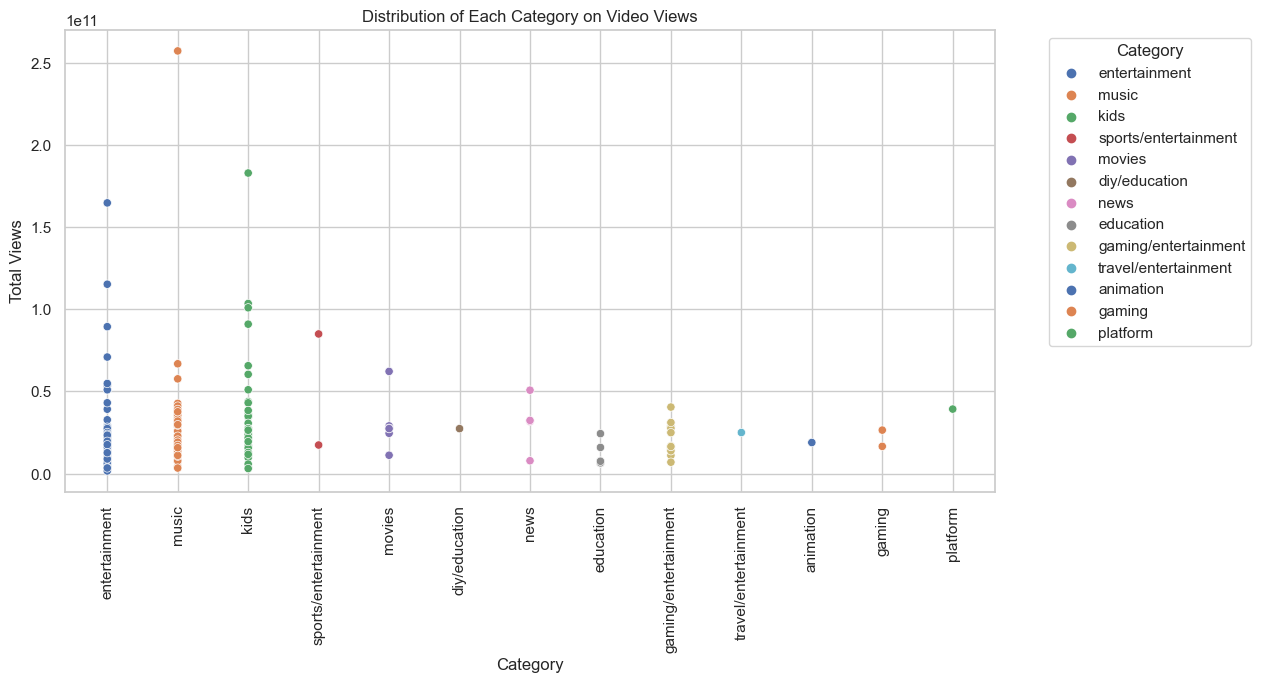

In [150]:
# Distribution of categories on video views
plt.figure(figsize=(12, 6))
sns.scatterplot(x='category', y='total_views', data=df, hue='category', palette='deep')
plt.title('Distribution of Each Category on Video Views')
plt.xlabel('Category')
plt.ylabel('Total Views')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Distribution of Each Category on Subscribers

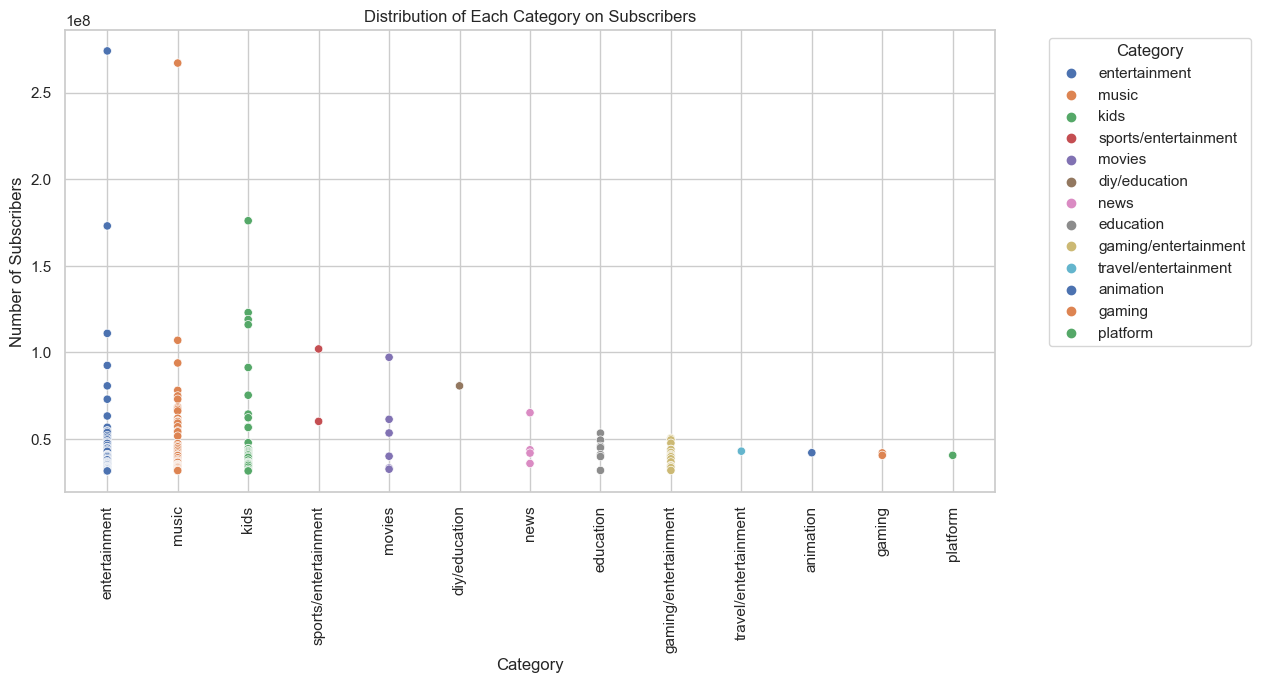

In [154]:
# Distribution of categories on video counts
plt.figure(figsize=(12, 6))
sns.scatterplot(x='category', y='no_of_subscribers', data=df, hue='category', palette='deep')
plt.title('Distribution of Each Category on Subscribers')
plt.xlabel('Category')
plt.ylabel('Number of Subscribers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Relationship between Number of Videos and Total Views

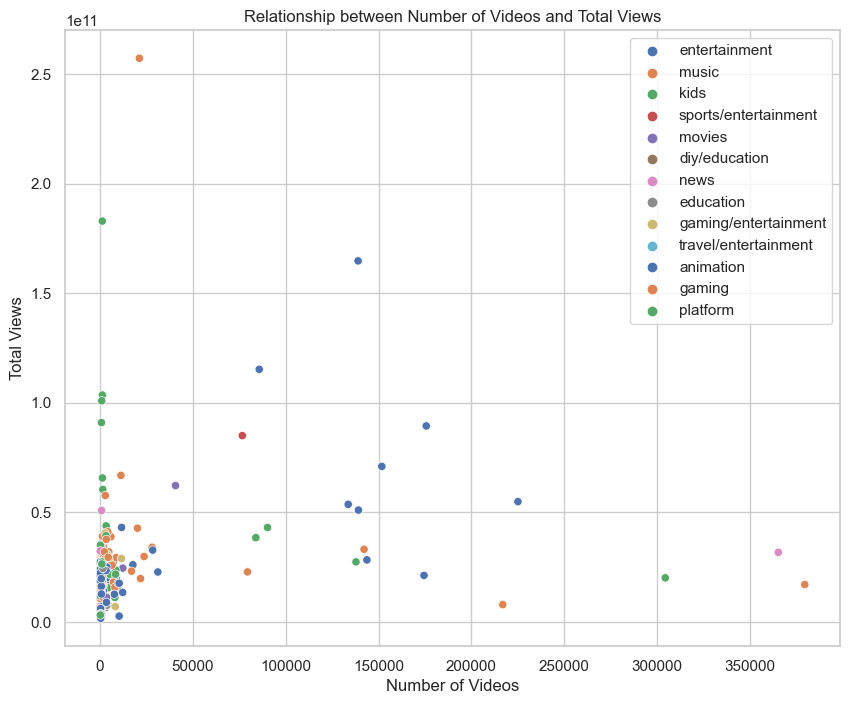

In [155]:
# Relationship between number of videos and total views
plt.figure(figsize=(10, 8))
sns.scatterplot(x='no_of_videos', y='total_views', data=df, hue='category', palette='deep')
plt.title('Relationship between Number of Videos and Total Views')
plt.xlabel('Number of Videos')
plt.ylabel('Total Views')
plt.legend()
plt.show()

Relationship between Number of Subscribers and Total Views

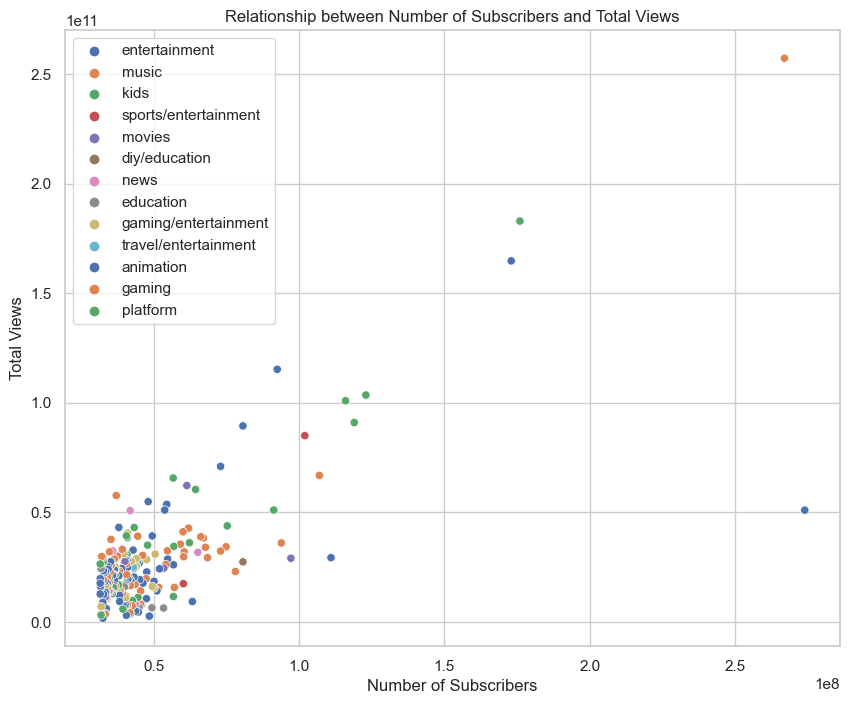

In [156]:
# Relationship between number of subscribers and total views
plt.figure(figsize=(10, 8))
sns.scatterplot(x='no_of_subscribers', y='total_views', data=df, hue='category', palette='deep')
plt.title('Relationship between Number of Subscribers and Total Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Total Views')
plt.legend()
plt.show()

Correlation Heatmap between Total Views, Number of Videos, and Number of Subscribers

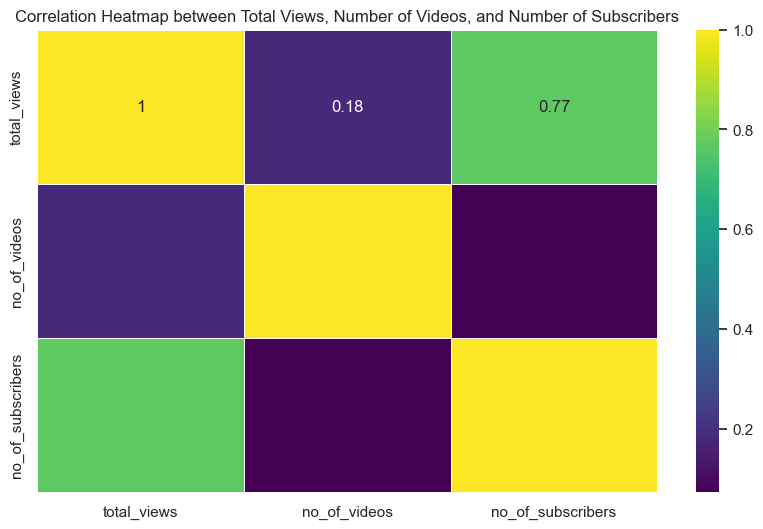

In [157]:
# Select the relevant columns for correlation
corr_df = df[['total_views', 'no_of_videos', 'no_of_subscribers']]

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap between Total Views, Number of Videos, and Number of Subscribers')
plt.show()